In [3]:
import pandas as pd
import numpy as np

# <수치 예측 목적의 머신러닝 기법 적용>
## 0. data 준비하기

In [2]:
#scikit-learn의 datasets에서 sample data import
from sklearn.datasets import load_boston
boston = load_boston() # boston dataset load

print(boston.keys()) # 각 key 확인
print(boston.DESCR) # boston datasets description

# 데이터 프레임으로 변환
dt_boston = pd.DataFrame(data = boston.data, columns = boston.feature_names)
dt_boston['price'] = boston.target

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

/Users/pheeree/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

In [3]:
#. 데이터 확인
dt_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


데이터를 훈련 데이터와 검증 데이터로 나누기

In [75]:
from sklearn.model_selection import train_test_split
x = dt_boston.drop('price', axis = 1)
y = dt_boston.price
#test data size는 전체의 25%
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.30, random_state = 123)

## 1. 다중 회기 분석

### scikit-learn을 활용한 회귀분석

In [5]:
from prometheus_client import Summary
from sklearn.linear_model import LinearRegression

model = LinearRegression()
glm_fit = model.fit(x_train, y_train)

In [65]:
glm_fit

LinearRegression()

sckit-learn은 모델 요약 기능이 만족스럽지 않다. 그래서 statsmodels 라이브러리를 활용한 회귀분석을 시도해 본다.

### statsmodels을 활용한 회기분석

In [79]:
import statsmodels.api as sm

model = sm.OLS(endog = y_train, exog = x_train)
res = model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              708.8
Date:                Mon, 24 Oct 2022   Prob (F-statistic):                   9.38e-238
Time:                        23:06:41   Log-Likelihood:                         -1045.8
No. Observations:                 354   AIC:                                      2118.
Df Residuals:                     341   BIC:                                      2168.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

INDUS, CHAS, NOX, AGE 변수를 제외한 모델을 만들어 본다.

In [80]:
x_train_step = x_train[['CRIM', 'ZN', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO']]

model2 = sm.OLS(endog = y_train, exog = x_train_step)
res2 = model2.fit()
print(res2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              1049.
Date:                Mon, 24 Oct 2022   Prob (F-statistic):                   3.98e-229
Time:                        23:11:18   Log-Likelihood:                         -1087.3
No. Observations:                 354   AIC:                                      2189.
Df Residuals:                     347   BIC:                                      2216.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 2. 의사결정트리 기법 사용

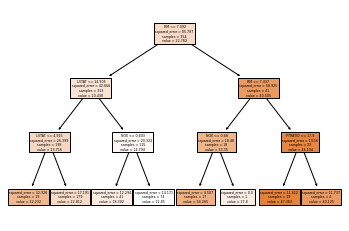

MSE: 28.779


In [8]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
# 
DCTr = DecisionTreeRegressor(max_depth=3, random_state=0)
#. model training
DCTr_fit = DCTr.fit(x_train, y_train)
#. testing the model
dt_pred = DCTr.predict(x_test)

#. plot tree
plot_tree(DCTr_fit, 
         feature_names = boston.feature_names, 
         #class_names = boston.target_names,
          filled=True)
plt.show()

#.MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, dt_pred)
print('MSE: %.3f' % mean_squared_error(y_test, dt_pred))

## 3. 인공신경망 기법 사용  

In [9]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
# model training
mlp_fit = mlp.fit(x_train, y_train)
# testing the model
dt_pred = mlp.predict(x_test)

#.MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, dt_pred)
print('MSE: %.3f' % mean_squared_error(y_test, dt_pred))

MSE: 40.217


/Users/pheeree/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## 4. 앙상블 기법(랜덤포레스트 기법) 사용

In [10]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
# model training
rf_fit = rf.fit(x_train, y_train)
# testing the model
dt_pred = rf.predict(x_test)

#.MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, dt_pred)
print('MSE: %.3f' % mean_squared_error(y_test, dt_pred))

MSE: 13.689


# <자율학습 모델 적용하기>

## 1. 클러스터링(군집) 분석 K-means Cluster

### ... data 준비하기
    iris 데이터를 준비합니다.

In [4]:
# scikit-learn의 샘플 데이터 로드를 위해 import
from sklearn.datasets import load_iris 
iris = load_iris()
# feature
print(iris.feature_names)
# label
print(iris.target_names)


# feature_names 와 target을 레코드로 갖는 데이터프레임 생성
dt_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
dt_iris['target'] = iris.target

# 0.0, 1.0, 2.0으로 표현된 label을 문자열로 매핑
dt_iris['target'] = dt_iris['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})
dt_iris

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### ... kmeans 분석 수행

In [12]:
dt_iris_kmeans = dt_iris.drop('target', axis = 1)
dt_iris_kmeans

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0).fit(dt_iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])

iris_fit = pd.concat([dt_iris, pd.DataFrame(kmeans.labels_)], axis=1)

iris_fit.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species', 'KmeansFit']

pd.crosstab(iris_fit.Species, iris_fit.KmeansFit)


KmeansFit,0,1,2
Species,,,
setosa,0,50,0
versicolor,48,0,2
virginica,14,0,36


### ... 시각화

In [13]:
#. 시각화
import matplotlib.pyplot as plt

plt.scatter(dt_iris.iloc[:,0], dt_iris.iloc[:,1],c = clusters,s = 50, cmap="viridis");


plt.scatter(centers[:,0], centers[:,1],c = "black", s = 200, alpha = 0.5);

NameError: name 'clusters' is not defined

## 2. 차원축소 기법 PCA

라이브러리를 로드한다.

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#. 데이터를 로드하고 정보를 확인한다.
dt_USArrest = pd.read_csv("./Data/USArrests.csv", index_col='Unnamed: 0' )

display(dt_USArrest.describe())
display(dt_USArrest.info())
display(dt_USArrest.head())

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


None

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [59]:
X = dt_USArrest
scaler = StandardScaler()
X_scaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(data=X_scaled, index=X.index, columns=X.columns)

In [62]:
pca = PCA(n_components=4) # 주성분의 갯수
pca.fit(X)
pc_score = pca.transform(X)

# 주성분으로 이루어진 데이터 프레임 구성
pc_score = pd.DataFrame(data=pc_score, columns = ['PC1', 'PC2','PC3','PC4'])
# 주성분 계수 
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3','PC4'], index=dt_USArrest.columns)
#주성분 score
pc_score.head() 

pca.explained_variance_ratio_  

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [63]:
loadings

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


## 3. 연관성 분석(장바구니 분석)

#### ... data 준비

In [14]:
import pandas as pd

dt_grocery = pd.read_csv("./data/groceries.csv",  header = None)
dt_grocery

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####  라이브러리를 로드하고 거래 데이터를 장바구니 분석 라이브러리에 적합하게 가공하기

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

transactions = []
for i in range(0, 7501) : transactions.append([str(dt_grocery.values[i,j]) for j in range(0, 20) ])


#### 조건을 설정하지 않은 연관성 분석 수행

In [16]:
from apyori import apriori
rules_base = apriori(transactions = transactions)
results_base = pd.DataFrame(rules_base)
results_base

,items,support,ordered_statistics
0,(chocolate),0.163845,"[((), (chocolate), 0.1638448206905746, 1.0)]"
1,(eggs),0.179709,"[((), (eggs), 0.17970937208372217, 1.0)]"
2,(french fries),0.170911,"[((), (french fries), 0.1709105452606319, 1.0)]"
3,(green tea),0.132116,"[((), (green tea), 0.13211571790427942, 1.0)]"
4,(milk),0.129583,"[((), (milk), 0.12958272230369283, 1.0)]"
5,(mineral water),0.238368,"[((), (mineral water), 0.23836821757099053, 1.0)]"
6,(nan),0.999867,"[((), (nan), 0.9998666844420744, 1.0)]"
7,(spaghetti),0.174110,"[((), (spaghetti), 0.17411011865084655, 1.0)]"
8,"(nan, chocolate)",0.163845,"[((), (nan, chocolate), 0.1638448206905746, 1...."
9,"(nan, eggs)",0.179709,"[((), (nan, eggs), 0.17970937208372217, 1.0), ..."


#### 지지도와 신뢰도 제한 조건을 설정하고 연관성 분석을 수행하고 결과 보기

In [32]:
rules = apriori(transactions = transactions, min_support = 0.005, min_confidence = 0.5, 
                min_length = 2)
results = list(rules)

In [81]:
def inspect(results):
    #lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultsinDataFrame = pd.DataFrame(inspect(results),
                                  columns = ["Left Hand Side","Right Hand Side",
                                             "Support", "Confidence", "Lift"])
resultsinDataFrame


,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,e,nan,0.999867,0.999867,1.000000
1,p,nan,0.020264,0.993464,0.993597
2,d,nan,0.008799,0.985075,0.985206


# <모델성능 평가하기>
## 1. 여러 모델 성능의 비교 평가

scikit-learn에 있는 모델 및 평가 함수를 이용하여 각 분류 모델을 학습하고 성능을 평가한다

In [5]:
##. 학습용과 검증용 데이터를 분리
from sklearn.model_selection import train_test_split
x = dt_iris.drop('target', axis = 1)
y = dt_iris.target
#test data size는 전체의 25%
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.30, random_state = 123)

##. 모델 성능 평가를 위한 함수
from sklearn.metrics import confusion_matrix, accuracy_score

##. DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# 
DCTr = DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state = 0)
# model training
DCTr_fit = DCTr.fit(x_train2, y_train2)
# testing the model
DCTr_pred = DCTr.predict(x_test2)
print("DecisionTreeClassifier")
print(confusion_matrix(y_test2, DCTr_pred))
print('Accuracy : ', accuracy_score(y_test2, DCTr_pred))

##. NaiveBeyes
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
# model training
gb_fit = gb.fit(x_train2, y_train2)
# testing the model
gb_pred = gb.predict(x_test2)
print("NaiveBeyes")
print(confusion_matrix(y_test2, gb_pred))
print('Accuracy : ', accuracy_score(y_test2, gb_pred))

##. RandomForest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
# model training
rf_fit = rf.fit(x_train2, y_train2)
# testing the model
rf_pred = rf.predict(x_test2)
print("RandomForestClassifier")
print(confusion_matrix(y_test2, rf_pred))
print('Accuracy : ', accuracy_score(y_test2, rf_pred))


DecisionTreeClassifier
[[18  0  0]
 [ 0 10  0]
 [ 0  3 14]]
Accuracy :  0.9333333333333333
NaiveBeyes
[[18  0  0]
 [ 0 10  0]
 [ 0  2 15]]
Accuracy :  0.9555555555555556
RandomForestClassifier
[[18  0  0]
 [ 0 10  0]
 [ 0  3 14]]
Accuracy :  0.9333333333333333
